In [1]:
import joblib
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_features = joblib.load('train_tl_features.pkl')
train_labels = joblib.load('train_labels.pkl')
validation_features = joblib.load('validate_tl_features.pkl')
validation_labels = joblib.load('validate_labels.pkl')
test_features = joblib.load('test_tl_features.pkl')
test_labels = joblib.load('test_labels.pkl')

train_features.shape, validation_features.shape, test_features.shape

((18300, 2048), (6100, 2048), (6100, 2048))

In [3]:
train_labels.shape, validation_labels.shape, test_labels.shape

((18300,), (6100,), (6100,))

In [4]:
from keras.utils import to_categorical

train_labels_ohe = to_categorical(train_labels)
validation_labels_ohe = to_categorical(validation_labels)
test_labels_ohe = to_categorical(test_labels)

In [5]:
train_labels_ohe.shape, validation_labels_ohe.shape, test_labels_ohe.shape

((18300, 10), (6100, 10), (6100, 10))

In [6]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(train_features.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_labels_ohe.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2628106 (10.03 MB)
Trainable params: 2628106 (10.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(train_features,
                    train_labels_ohe,
                    epochs=50,
                    batch_size=256,
                    validation_data=(validation_features, validation_labels_ohe), 
                    shuffle=True,
                    verbose=1)

Epoch 1/50
72/72 [==============================] - 4s 40ms/step - loss: 2.9092 - accuracy: 0.4969 - val_loss: 0.9398 - val_accuracy: 0.7159
Epoch 2/50
72/72 [==============================] - 2s 32ms/step - loss: 1.0100 - accuracy: 0.6629 - val_loss: 0.7452 - val_accuracy: 0.7684
Epoch 3/50
72/72 [==============================] - 2s 30ms/step - loss: 0.8366 - accuracy: 0.7175 - val_loss: 0.6410 - val_accuracy: 0.8002
Epoch 4/50
72/72 [==============================] - 2s 31ms/step - loss: 0.7290 - accuracy: 0.7537 - val_loss: 0.5813 - val_accuracy: 0.8128
Epoch 5/50
72/72 [==============================] - 2s 31ms/step - loss: 0.6506 - accuracy: 0.7785 - val_loss: 0.5297 - val_accuracy: 0.8282
Epoch 6/50
72/72 [==============================] - 2s 29ms/step - loss: 0.5836 - accuracy: 0.8034 - val_loss: 0.4984 - val_accuracy: 0.8366
Epoch 7/50
72/72 [==============================] - 2s 30ms/step - loss: 0.5309 - accuracy: 0.8217 - val_loss: 0.4928 - val_accuracy: 0.8364
Epoch 8/50
72

In [8]:
predictions = model.predict(test_features)

191/191 [==============================] - 1s 5ms/step


In [9]:
predictions[0]

array([9.99470890e-01, 3.60119429e-07, 9.94842367e-07, 1.19198903e-05,
       5.75054810e-06, 3.23637738e-04, 4.95922947e-08, 8.07616525e-05,
       2.58438740e-06, 1.03049744e-04], dtype=float32)

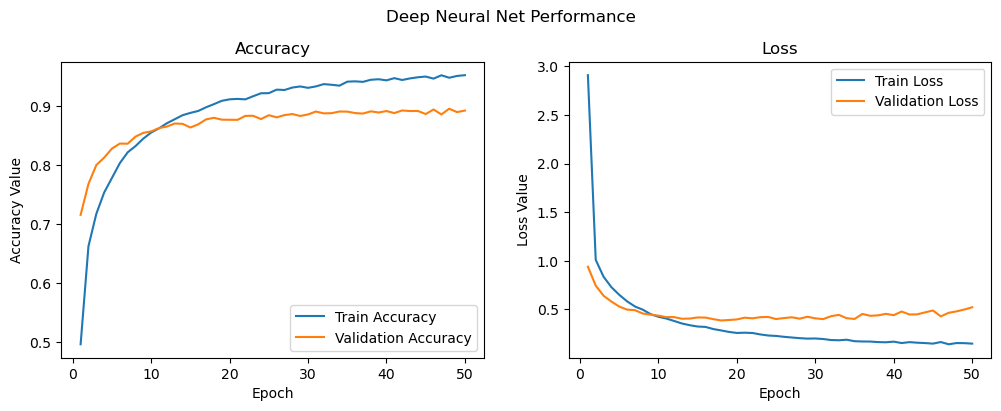

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.2)

epochs = list(range(1,51))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [29]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
             '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}

test_labels_categories = [class_map[str(label)] for label in test_labels]
predicted_classes = np.argmax(predictions, axis=1)
prediction_labels_categories = [class_map[str(label)] for label in predicted_classes]
category_names = list(class_map.values())

In [30]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def get_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    return accuracy, precision, recall, f1

def display_classification_report(true_labels, predicted_labels, classes):
    report = classification_report(true_labels, predicted_labels, target_names=classes)
    print(report)

def display_confusion_matrix_pretty(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



metrics_results = get_metrics(true_labels=test_labels_categories, predicted_labels=prediction_labels_categories)
print(metrics_results)

Accuracy: 0.8752
Precision: 0.8758
Recall: 0.8752
F1 Score: 0.8751
(0.8752459016393442, 0.8758113988319903, 0.8752459016393442, 0.8750675079688068)


In [31]:
display_classification_report(true_labels=test_labels_categories, 
                                  predicted_labels=prediction_labels_categories, 
                                  classes=category_names)

                  precision    recall  f1-score   support

 air_conditioner       0.89      0.93      0.91       841
        car_horn       0.84      0.81      0.82       183
children_playing       0.78      0.79      0.78       729
        dog_bark       0.88      0.84      0.86       607
        drilling       0.92      0.84      0.88       703
   engine_idling       0.92      0.94      0.93       777
        gun_shot       0.92      0.97      0.94        60
      jackhammer       0.88      0.94      0.91       681
           siren       0.95      0.93      0.94       701
    street_music       0.79      0.80      0.80       818

        accuracy                           0.88      6100
       macro avg       0.88      0.88      0.88      6100
    weighted avg       0.88      0.88      0.88      6100



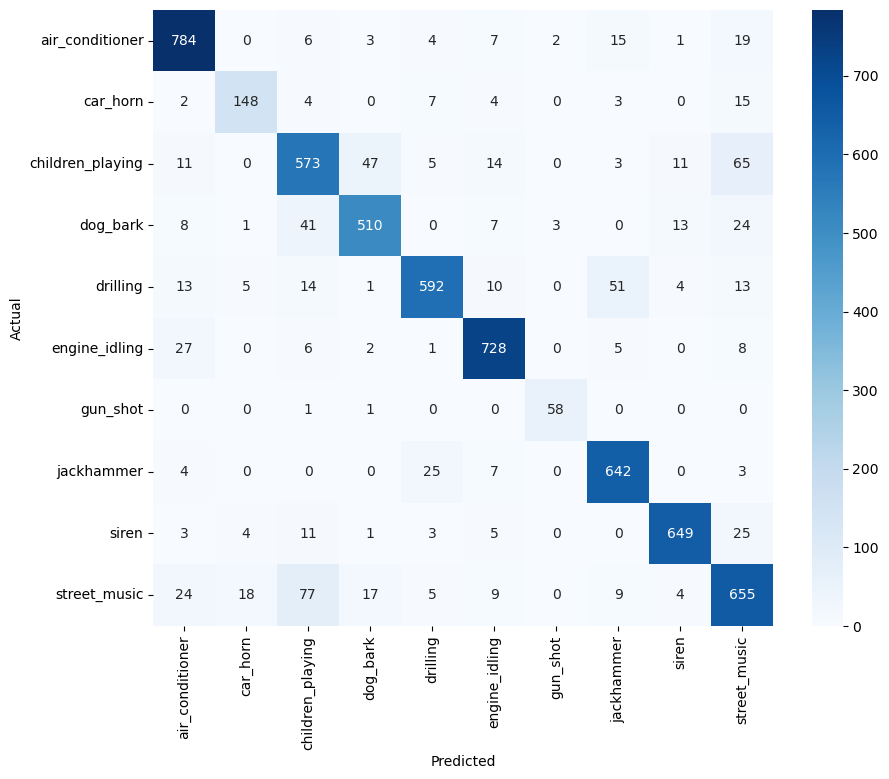

In [32]:
display_confusion_matrix_pretty(true_labels=test_labels_categories, 
                                    predicted_labels=prediction_labels_categories, 
                                    classes=category_names)

In [33]:
model.save('sound_classification_model.h5') 

d:\anaconda\envs\dzy\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
